

---


# **Problem Statement**


---


Keeping Inventory of spare in various service centre to the market demand is
always a challenge as most service centres spend significantly in spare parts inventory costs. In spite of this, availability of spare parts has been one of the problem areas.

[Just-in-time (JIT)](https://www.business.org/finance/inventory-management/what-is-just-in-time-inventory-management/) is an inventory management method in which you keep as little inventory on hand as possible. That means you don’t stockpile products just in case you need them — you simply reorder products to replace those you’ve already sold.

The goal of a JIT system is to receive new products just as they’re needed — any sooner and you’ll have excess inventory levels, and you’ll encounter stockouts if shipments come too late. When implemented correctly, a JIT inventory system can help retailers.

The JIT inventory method helps businesses keep enough inventory on hand to fulfill customer orders, while also keeping inventory levels as low as possible. This allows you to enjoy significant cost savings on inventory storage (since you have fewer items to store), but it has a couple of other financial benefits.

**Task 1:** - Create Predictive model for inventory forecasting so that
a service centre achieves JIT standards.

**Task 2:** - Prepare a complete data analysis report on the given data.

**Task 3:** - Identify the factors that affect demand.

**Task 3:** - Create a report stating the performance of multiple models on this data and suggest the best model for production.


**Dataset:** Confidential
* Port No 18.136.157.135
* DB Name: project_service_data


**Data Description**

●	abc.csv
* The main file which contains parts inventory data, exported using SQL



---


#**Project Solution Approach**


---



The project solution approach follows a standard Machine Learning project methodology described below:

* **Data Preprocessing**:
    - Clean and preprocess dataset. Handle missing values, outliers, and any inconsistencies.
    - Convert date columns to appropriate datetime formats.
    - Extract relevant features from the invoice_line_text (e.g., product categories, keywords).

* **Feature Engineering**:
    - Creating new features that might impact demand or inventory levels. For example:
        - Day of the week (weekday vs. weekend).
        - Seasonality (month, quarter).
        - Historical demand trends.
        - Promotions or special events.

* **Exploratory Data Analysis (EDA)**:
    - Visualizing data to understand patterns, correlations, and distributions.
    - Identifying any seasonality, trends, or anomalies.

* **Model Building/Training/Testing**:
    - Training predictive models to estimate demand or inventory levels.
    - Some relevant models include:
        - **Linear Regression**: Predict inventory levels based on features.
        - **Random Forests**: Handle non-linear relationships and feature importance.
        - **Gradient Boosting**: Ensemble method for accurate predictions.
        - **Neural Networks**: Deep learning models for complex patterns.

* **Evaluation and Validation**:
    - Evaluating model performance using metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or Mean Absolute Percentage Error (MAPE).

* **Implementation**:
    - Once a reliable model is identified, it is integrated it into the inventory management system.
    - The model is continuously monitored and updated as new data becomes available.



---


#**Findings**


---


The following five models were evaluated:
* Linear Regression,

* Ridge,
    
* XGBRegressor,
    
* Random Forest Regressor.

**RandomForestRegressor** proved to be the best model based on cross-validation score. The Training Score for Random Forest Regressor was **86.1%**, hence it is recommended for integration into the business's inventory management system. This would help the automotive spare parts business to achieve endeavors for JIT inventory management and curtail losses.



---


#**Challenges**


---


* Since this is a corporate challenge, there are data privacy issues that limited the project team from intensive exploration.

* There was no interface between the data owners and the project team, hence some proper needs analysis could not be conducted.

* The dataset is limited to demand figures for one year only (2017). This is not sufficient to detect historical trends, which is very crucial for accurate predictive analysis.

* The solution approach is only limited to notebook demonstration and remains far from solving the business problem being encountered since appropriate enterprise-scale deployment would need feature pipeline and applicable MLOps platform.

---


# **Best Practices in JIT Inventory Management**


---
As in everything else, we can always count on a set of [best practices](https://www.linkedin.com/pulse/just-in-time-jit-inventory-management-pros-cons-best-practices-vela/) that can help us succeed in JIT inventory management. The following is a list based on wide experience in this area:

**Strong supplier relationships:** A close relationship with suppliers can help ensure that they are reliable and provide high-quality materials or products when needed.

**Robust communication:** Effective communication with suppliers, customers, and internal teams is essential to ensure that everyone is aware of changes, delays, or issues that may impact JIT inventory management.

**Contingency planning:** Having a backup plan in place can help minimize the impact of unexpected events or disruptions, such as delays or shortages.

**Continuous improvement:** Continuous improvement involves identifying areas for improvement and implementing changes to improve processes and results over time.

**Automation and technology:** Automation and technology can help streamline processes, reduce errors, and improve communication and visibility.

**Cross-functional teams:** Cross-functional teams can help ensure that everyone involved in JIT inventory management is aligned and working toward common goals.

**Balancing inventory levels and lead times:** Balancing inventory levels and lead times can help ensure that companies have the right amount of inventory on hand to meet demand without overstocking or causing delays.

**Real-time data tracking and visibility:** Real-time data tracking and visibility can help companies make more informed decisions, identify issues or opportunities, and respond quickly to changes.



---


# **References and Acknowledgements**


---


During the course of the project, authors consulted several sources amongst the ones listed below:

1. [What is Just-In-Time (JIT) Inventory Management?](https://www.business.org/finance/inventory-management/what-is-just-in-time-inventory-management/)

2. [Inventory Demand FOrecasting Using Machine Learning](https://www.geeksforgeeks.org/inventory-demand-forecasting-using-machine-learning-python/)

3. [Machine Learning for Retail Demand FOrecasting](https://towardsdatascience.com/machine-learning-for-store-demand-forecasting-and-inventory-optimization-part-1-xgboost-vs-9952d8303b48)

4. [Automated Feature Engineering Basics](https://www.kaggle.com/code/willkoehrsen/automated-feature-engineering-basics)



---


# **1. Import Libraries**

In [ ]:
# drive module for mounting gdrive storage
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/MyDrive/PRCL-0027-InvForecasting'

Mounted at /content/gdrive
[Errno 2] No such file or directory: '/content/gdrive/MyDrive/PRCL-0027-InvForecasting'
/content


In [ ]:
# show current directory
!pwd

/content


In [ ]:
# basic libraries for statistics and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae



---


# **2. Load Data**
* File containing spare parts inventory

In [ ]:
# load data from CSV files
df = pd.read_csv('/content/gdrive/MyDrive/ab.csv')
display(df.head())
print('='*150)
display(df.tail())

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL


,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
28477,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,SPROCKET RUBBER
28478,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,CLUTCH CABLE
28479,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,OIL FILTER
28480,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,DISC OIL
28481,06-01-19,06-01-19,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805,AIR FILTER


## **Understanding dataset**

* **invoice_date:** This column likely represents the date when the invoice for the service was issued.

* **job_card_date:** This column probably represents the date when the service job was performed.

* **business_partner_name:** This could be the name of the business or service center where the vehicle maintenance was done.

* **vehicle_no:** This is likely the registration number or license plate number of the vehicle.

* **vehicle_model:** This column indicates the model of the vehicle that received the service.

* **current_km_reading:** This is the current odometer reading of the vehicle at the time of service.

* **invoice_line_text:** This column seems to describe the type of service or maintenance performed on the vehicle.



---


# **3. Assessing the data**

This step involves visually and programmatically examining the data for data quality and tidiness issues.


In [ ]:
# Print shape
print(df.shape)

(28482, 7)


In [ ]:
# check data types for columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   invoice_date           28482 non-null  object
 1   job_card_date          28482 non-null  object
 2   business_partner_name  28482 non-null  object
 3   vehicle_no             28482 non-null  object
 4   vehicle_model          28482 non-null  object
 5   current_km_reading     28482 non-null  int64 
 6   invoice_line_text      28448 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


---


* The spare parts inventory dataset consists of 1,000 records, each record containing 7 (columns) features.

* one feature is of data type integer, whilst others are object datatypes.

* The (inventory_line_text) column serves as the attribute of interest, matching the stock items that the business trades.

* The target should be the demand for stock items but is currently not included. Feature engineering approaches will be applied in order to have a demand or sales related attribute.

* Regarding the data in each column, we can observe that there are no null values.

* The invoice_date and job_card_date columns need to be formatted as date columns
---

In [ ]:
# Checking the % of count of unique values in each categorical column

cols_cat = df.select_dtypes(['object'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(df[i].value_counts(normalize = True))
    print('*'*40)

Unique values in invoice_date are :
01-12-18    0.006285
04-12-18    0.005863
30-11-18    0.005196
05-11-18    0.004775
05-09-18    0.004670
              ...   
27-12-17    0.000176
18-11-18    0.000176
18-02-18    0.000140
09-07-17    0.000035
30-05-17    0.000035
Name: invoice_date, Length: 555, dtype: float64
****************************************
Unique values in job_card_date are :
01-12-18    0.006285
04-12-18    0.005863
30-11-18    0.005196
05-11-18    0.004775
05-09-18    0.004670
              ...   
15-01-18    0.000176
18-11-18    0.000176
18-02-18    0.000140
09-07-17    0.000035
30-05-17    0.000035
Name: job_card_date, Length: 553, dtype: float64
****************************************
Unique values in business_partner_name are :
venkXXXXXXXXXX    0.014887
manjXXXXXXXXXX    0.012710
prasXXXXXXXXXX    0.011516
shivXXXXXXXXXX    0.011025
chanXXXXXXXXXX    0.010954
                    ...   
SUMAXXXXXXXXXX    0.000035
VIRUXXXXXXXXXX    0.000035
ARGHXXXXXXXXXX    0.00003

In [ ]:
# Checking the count of unique values in each categorical column

cols_uniq = df.select_dtypes(['object'])

for i in cols_uniq.columns:
    print('Unique values in',i, 'are :')
    print(df[i].nunique())
    print('*'*40)

Unique values in invoice_date are :
555
****************************************
Unique values in job_card_date are :
553
****************************************
Unique values in business_partner_name are :
1010
****************************************
Unique values in vehicle_no are :
846
****************************************
Unique values in vehicle_model are :
28
****************************************
Unique values in invoice_line_text are :
502
****************************************


**Insights**

* More than 60% of the services done by the centre are for three vehicle models: BAJAJ PULSAR 150 (31.3%), BAJAJ AVENGER STREET 220 (16.9%) and BAJAJ PULSAR 220 (11.9%).

* The centre serviced 17 unique vehicle models

* There are 139 unique service types in the dataset

* The service centre deals with 105 business partners

* Only 68 vehicles received service from the centre

* **NB:** This information can be used to optimize the quality of service towards the prominent vehicle models.



---


# **4. Data Cleaning**

After assessing the data, some data quality issues were observed in the dataset and the steps below outline the cleaning process.

* converting datatypes for date related columns
* removing column names from the dataset that are deemed unnecessary for the analysis
* converting data types

In [ ]:
# prompt: use for loop to change df invoice_date and job_card_date to date data type

for column in ["invoice_date", "job_card_date"]:
  df[column] = pd.to_datetime(df[column])


In [ ]:
# check new datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28482 entries, 0 to 28481
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   invoice_date           28482 non-null  datetime64[ns]
 1   job_card_date          28482 non-null  datetime64[ns]
 2   business_partner_name  28482 non-null  object        
 3   vehicle_no             28482 non-null  object        
 4   vehicle_model          28482 non-null  object        
 5   current_km_reading     28482 non-null  int64         
 6   invoice_line_text      28448 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
# prompt: print df, only columns invoice_date and jopb_card_date

print(df[["invoice_date","job_card_date"]])


      invoice_date job_card_date
0       2017-05-30    2017-05-30
1       2017-02-06    2017-05-31
2       2017-02-06    2017-05-31
3       2017-02-06    2017-05-31
4       2017-02-06    2017-05-31
...            ...           ...
28477   2019-06-01    2019-06-01
28478   2019-06-01    2019-06-01
28479   2019-06-01    2019-06-01
28480   2019-06-01    2019-06-01
28481   2019-06-01    2019-06-01

[28482 rows x 2 columns]


**Insights**

* Based on the above results, the invoice_date and job_card_date largely coincide, hence one columnn can be dropped in further analysis. Job card date will be dropped.

* invoice_date parts will be used for further analysis.



---
# **5. Feature Engineering**
This is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. There are times when multiple features are provided in the same feature or we have to derive some features from the existing ones. We will derive features from the date columns.If the features derived are meaningful then they become a deciding factor in increasing the model’s accuracy significantly.

Features that might impact demand or inventory levels are:
* Day of the week (weekday vs. weekend).

* Seasonality (month, quarter).

* Historical demand trends.

* Promotions or special events.



In [ ]:
# prompt: group rows by invoice_date and invoice_line_text and business_partner_name

df_grp1 = df.groupby(['invoice_date', 'business_partner_name']).size().reset_index(name='daily_demand')


In [ ]:
# check grouped dataset
df_grp1

,invoice_date,business_partner_name,daily_demand
0,2017-01-06,ANMOXXXXXXXXXX,5
1,2017-01-06,PRASXXXXXXXXXX,6
2,2017-01-06,SATHXXXXXXXXXX,3
3,2017-01-06,diliXXXXXXXXXX,3
4,2017-01-06,kesaXXXXXXXXXX,13
...,...,...,...
4093,2019-05-01,venkXXXXXXXXXX,9
4094,2019-06-01,PRITXXXXXXXXXX,6
4095,2019-06-01,dharXXXXXXXXXX,7
4096,2019-06-01,pravXXXXXXXXXX,9


In [ ]:
# prompt: count of unique values in business_partner_name

print(df_grp1['business_partner_name'].nunique())


1010


**Insights**

* There is little information derived from grouping inventory data by business partner.

* There are 139 grouped data rows, which is almost similar to 105 unique business partners in the whole dataset.

* The business_partner_name attribute will be dropped in further analysis.

In [ ]:
# prompt: group rows by invoice_date and invoice_line_text

df_grp2 = df.groupby(['invoice_date', 'invoice_line_text']).size().reset_index(name='daily_demand')


In [ ]:
# check grouped dataset
df_grp2

,invoice_date,invoice_line_text,daily_demand
0,2017-01-06,3M OIL,5
1,2017-01-06,AIR FILTER CHECKUP,3
2,2017-01-06,BRAKE SHOE,1
3,2017-01-06,CARBURETOR CLEANING,1
4,2017-01-06,CHAIN LUBRICATION,5
...,...,...,...
12660,2019-06-01,NUMBER PLATE,1
12661,2019-06-01,NUMBER PLATE CLAMP,1
12662,2019-06-01,OIL FILTER,1
12663,2019-06-01,POLISH,2


In [ ]:
# prompt: count of unique values in invoice_line_text in df_grp2

print(df_grp2['invoice_line_text'].nunique())


502


In [ ]:
# prompt: count of unique values in invoice_date in df_grp2

df_grp2['invoice_date'].nunique()


555

In [ ]:
# prompt: print maximum daily_demand in df_grp2

print(df_grp2['daily_demand'].max())


17


In [ ]:
# prompt: print row with maximum daily_demand in df_grp2

print(df_grp2.loc[df_grp2['daily_demand'].idxmax()])


invoice_date         2018-06-10 00:00:00
invoice_line_text             ENGINE OIL
daily_demand                          17
Name: 7413, dtype: object


In [ ]:
# prompt: print top five unique invoice_line_text. Just print the invoice_line_text and the daily_demand

print(df_grp2.groupby('invoice_line_text')['daily_demand'].sum().sort_values(ascending=False).head())


invoice_line_text
ENGINE OIL           3802
CHAIN LUBRICATION    3441
GENERAL SERVICE      2142
AIR FILTER           1715
3M OIL               1628
Name: daily_demand, dtype: int64


In [ ]:
# prompt: print bottom five unique invoice_line_text. Just print the invoice_line_text and the daily_demand

df_grp2.groupby('invoice_line_text')['daily_demand'].sum().sort_values().head()


invoice_line_text
HELMET CABLE           1
HANDLE WEIGHT BOLT     1
HANDLE WEIGHT LIGHT    1
HANDLEBAR RUBBER       1
HANDLEBAR THREADING    1
Name: daily_demand, dtype: int64

In [ ]:
# display of top five and bottom five service types by frequency of occurrences
df_grp2.invoice_line_text.value_counts()

ENGINE OIL           553
CHAIN LUBRICATION    548
GENERAL SERVICE      535
3M OIL               517
CONSUMABLES          511
                    ... 
HEAD GASKET KIT        1
BRAKE RUBBER           1
MUDGAURD               1
MUDGAURD CLAMP         1
HELMET                 1
Name: invoice_line_text, Length: 502, dtype: int64

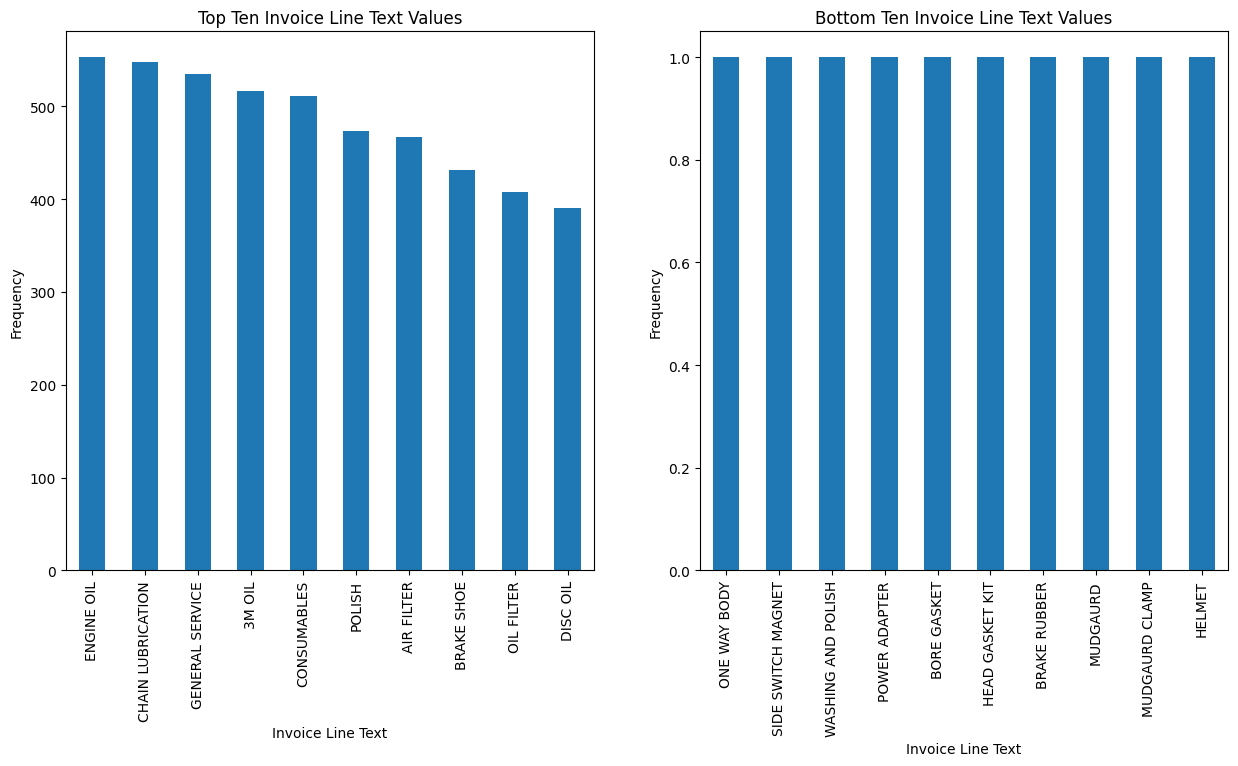

In [ ]:
# prompt: Plot bar graphs of the top ten and bottom ten invoice_line_text for df_grp2. Show the plots as subplots side by side

import matplotlib.pyplot as plt

# Get the top ten and bottom ten invoice_line_text values
top_ten = df_grp2['invoice_line_text'].value_counts().head(10)
bottom_ten = df_grp2['invoice_line_text'].value_counts().tail(10)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot the top ten invoice_line_text values as a bar chart in the first subplot
top_ten.plot(kind='bar', ax=ax1)
ax1.set_title('Top Ten Invoice Line Text Values')
ax1.set_xlabel('Invoice Line Text')
ax1.set_ylabel('Frequency')

# Plot the bottom ten invoice_line_text values as a bar chart in the second subplot
bottom_ten.plot(kind='bar', ax=ax2)
ax2.set_title('Bottom Ten Invoice Line Text Values')
ax2.set_xlabel('Invoice Line Text')
ax2.set_ylabel('Frequency')

# Show the plot
plt.show()


**Insights**

* Grouping service data by invoice_date and invoice_line_text generates more insightful demand data.

* The count of grouped rows represent daily_demand which can be used to predict the future demand for various services and related stock units (invoice_line_text).

* Top services done by the centre are [Engine Oil, Chain lubrication, General service, and Air filter checkuptypes whilst CAM shaft is among the least]. This information can be used to optimize inventory management by ensuring that the necessary parts and supplies are readily available to meet customer needs. Additionally, the service center can consider offering promotional packages or discounts on these frequently performed services to attract more customers and increase revenue.

* There is no loss of information due to grouping data by invoice date and stock item, we still have:
    - 139 unique stock items
    - 24 unique invoice dates

* Going further, the following attributes will be dropped:
    - job_card_date
    - vehicle_no
    - vehicle_model
    - current_km_reading

In [ ]:
'''
prompt: Convert date column invoice_date of df_grp2 into a string.
Then split the date parts into day, month and year.
'''

df_grp2['invoice_date'] = df_grp2['invoice_date'].astype(str)

df_grp2[['year', 'month', 'day']] = df_grp2['invoice_date'].str.split('-', expand=True).astype(int)
df_grp2

,invoice_date,invoice_line_text,daily_demand,year,month,day
0,2017-01-06,3M OIL,5,2017,1,6
1,2017-01-06,AIR FILTER CHECKUP,3,2017,1,6
2,2017-01-06,BRAKE SHOE,1,2017,1,6
3,2017-01-06,CARBURETOR CLEANING,1,2017,1,6
4,2017-01-06,CHAIN LUBRICATION,5,2017,1,6
...,...,...,...,...,...,...
12660,2019-06-01,NUMBER PLATE,1,2019,6,1
12661,2019-06-01,NUMBER PLATE CLAMP,1,2019,6,1
12662,2019-06-01,OIL FILTER,1,2019,6,1
12663,2019-06-01,POLISH,2,2019,6,1


In [ ]:
# Check new datatypes
df_grp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12665 entries, 0 to 12664
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   invoice_date       12665 non-null  object
 1   invoice_line_text  12665 non-null  object
 2   daily_demand       12665 non-null  int64 
 3   year               12665 non-null  int64 
 4   month              12665 non-null  int64 
 5   day                12665 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 593.8+ KB


In [ ]:
# prompt: rename date parts columns to invoice_day etc and invoice_line_text to service_type

df_grp2 = df_grp2.rename(columns={
    'day': 'invoice_day',
    'month': 'invoice_month',
    'year': 'invoice_year',
    'invoice_line_text': 'service_type'
})
df_grp2.head()


,invoice_date,service_type,daily_demand,invoice_year,invoice_month,invoice_day
0,2017-01-06,3M OIL,5,2017,1,6
1,2017-01-06,AIR FILTER CHECKUP,3,2017,1,6
2,2017-01-06,BRAKE SHOE,1,2017,1,6
3,2017-01-06,CARBURETOR CLEANING,1,2017,1,6
4,2017-01-06,CHAIN LUBRICATION,5,2017,1,6


In [ ]:
# Check new attributes
df_grp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12665 entries, 0 to 12664
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   invoice_date   12665 non-null  object
 1   service_type   12665 non-null  object
 2   daily_demand   12665 non-null  int64 
 3   invoice_year   12665 non-null  int64 
 4   invoice_month  12665 non-null  int64 
 5   invoice_day    12665 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 593.8+ KB


In [ ]:
# Checking the count of unique values in each integer column

cols_int = df_grp2.select_dtypes(['int'])

for i in cols_int.columns:
    print('Unique values in',i, 'are :')
    print(df_grp2[i].nunique())
    print('*'*40)

Unique values in daily_demand are :
17
****************************************
Unique values in invoice_year are :
3
****************************************
Unique values in invoice_month are :
12
****************************************
Unique values in invoice_day are :
31
****************************************


In [ ]:
# prompt: check unique invoice_year

unique_year = df_grp2['invoice_year'].unique()
print(unique_year)


[2017 2018 2019]


The dataset only contains service records for the year 2017

In [ ]:
'''
prompt: write a function to check if invoice_day is a weekend or not. If weekend the category is 1 and 0 if not.
The function should insert a new column weekend in df_grp2. Also check if invoice_month belong to festive season [1] or not [0].
A new column festive_month should also be inserted in df_grp2.
'''

def add_weekend_festive_columns(df_grouped2):
  df_grp2['weekend'] = np.where(df_grp2['invoice_day'].isin([6, 7]), 1, 0)
  festive_months = [10, 11, 12]
  df_grp2['festive_month'] = np.where(df_grouped2['invoice_month'].isin(festive_months), 1, 0)
  return df_grp2

df_grouped2 = add_weekend_festive_columns(df_grp2)


In [ ]:
# check new df
df_grp2.head()

,invoice_date,service_type,daily_demand,invoice_year,invoice_month,invoice_day,weekend,festive_month
0,2017-01-06,3M OIL,5,2017,1,6,1,0
1,2017-01-06,AIR FILTER CHECKUP,3,2017,1,6,1,0
2,2017-01-06,BRAKE SHOE,1,2017,1,6,1,0
3,2017-01-06,CARBURETOR CLEANING,1,2017,1,6,1,0
4,2017-01-06,CHAIN LUBRICATION,5,2017,1,6,1,0


In [ ]:
# check tail
df_grp2.tail()

,invoice_date,service_type,daily_demand,invoice_year,invoice_month,invoice_day,weekend,festive_month
12660,2019-06-01,NUMBER PLATE,1,2019,6,1,0,0
12661,2019-06-01,NUMBER PLATE CLAMP,1,2019,6,1,0,0
12662,2019-06-01,OIL FILTER,1,2019,6,1,0,0
12663,2019-06-01,POLISH,2,2019,6,1,0,0
12664,2019-06-01,SPROCKET RUBBER,1,2019,6,1,0,0


In [ ]:
# prompt: print count of rows where weekend and festive_month is 1

df_weekend_festive = df_grp2[(df_grp2['weekend'] == 1) & (df_grp2['festive_month'] == 1)]
print(len(df_weekend_festive))


282


In [ ]:
# prompt: print length of df where weekend is 1 or festive_month is 1

df_weekend_or_festive = df_grp2[(df_grp2['weekend'] == 1) | (df_grp2['festive_month'] == 1)]
print(len(df_weekend_or_festive))


4498


In [ ]:
# add a new column to df_grp2 that shows whether there was any Indian holiday [1] or not [0] in job_card_month
import holidays

def is_holiday(x):

  india_holidays = holidays.country_holidays('IN')

  if india_holidays.get(x):
    return 1
  else:
    return 0

df_grp2['holidays'] = df_grp2['invoice_date'].apply(is_holiday)
df_grp2.head()

,invoice_date,service_type,daily_demand,invoice_year,invoice_month,invoice_day,weekend,festive_month,holidays
0,2017-01-06,3M OIL,5,2017,1,6,1,0,0
1,2017-01-06,AIR FILTER CHECKUP,3,2017,1,6,1,0,0
2,2017-01-06,BRAKE SHOE,1,2017,1,6,1,0,0
3,2017-01-06,CARBURETOR CLEANING,1,2017,1,6,1,0,0
4,2017-01-06,CHAIN LUBRICATION,5,2017,1,6,1,0,0


In [ ]:
# prompt: check the number of rows that fell on a holiday month

df_holiday = df_grp2[df_grp2['holidays'] == 1]
print(len(df_holiday))


609


**NB:** The business will be closed on public holidays

In [ ]:
# add a weekday column which indicates the day of the week as an integer that job_card_date fell on.
df_grp2['invoice_date'] = pd.to_datetime(df_grp2['invoice_date'])
df_grp2['weekday'] = df_grouped2['invoice_date'].dt.weekday + 1
df_grp2.head()

,invoice_date,service_type,daily_demand,invoice_year,invoice_month,invoice_day,weekend,festive_month,holidays,weekday
0,2017-01-06,3M OIL,5,2017,1,6,1,0,0,5
1,2017-01-06,AIR FILTER CHECKUP,3,2017,1,6,1,0,0,5
2,2017-01-06,BRAKE SHOE,1,2017,1,6,1,0,0,5
3,2017-01-06,CARBURETOR CLEANING,1,2017,1,6,1,0,0,5
4,2017-01-06,CHAIN LUBRICATION,5,2017,1,6,1,0,0,5


In [ ]:
'''
prompt: check minimum and maximum weekday in df_grp2.
The solution should read - The minimum weekday is: {x}.
Then a line of [=] characters matching the length of the line statement.
Another statement that reads - The maximum weekday is: {y}
'''

print('The minimum weekday is:', df_grp2['weekday'].min())
print('=' * len('The minimum weekday is: 1'))
print('The maximum weekday is:', df_grp2['weekday'].max())


The minimum weekday is: 1
The maximum weekday is: 7


In [ ]:
# Adding new column - quarter to show seasonality
import math
df_grp2['quarter'] = df_grp2['invoice_month'].apply(lambda x: math.ceil(x/3))
df_grp2.head()


,invoice_date,service_type,daily_demand,invoice_year,invoice_month,invoice_day,weekend,festive_month,holidays,weekday,quarter
0,2017-01-06,3M OIL,5,2017,1,6,1,0,0,5,1
1,2017-01-06,AIR FILTER CHECKUP,3,2017,1,6,1,0,0,5,1
2,2017-01-06,BRAKE SHOE,1,2017,1,6,1,0,0,5,1
3,2017-01-06,CARBURETOR CLEANING,1,2017,1,6,1,0,0,5,1
4,2017-01-06,CHAIN LUBRICATION,5,2017,1,6,1,0,0,5,1


In [ ]:
# print df lenth in each quarter

for x in range(1,5):
  print("Records in Quarter {} are: {}".format(x, len(df_grp2[df_grp2['quarter']==x])))
  print("="*30)


Records in Quarter 1 are: 2301
Records in Quarter 2 are: 3089
Records in Quarter 3 are: 3516
Records in Quarter 4 are: 3759




---
## **Label Encoding invoice_line_text**
Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data.


In [ ]:
# Encode invoice_line_text
le = LabelEncoder()
df_grp2['service_type_enc'] = le.fit_transform(df_grp2['service_type'])

In [ ]:
# check df
df_grp2.head()

,invoice_date,service_type,daily_demand,invoice_year,invoice_month,invoice_day,weekend,festive_month,holidays,weekday,quarter,service_type_enc
0,2017-01-06,3M OIL,5,2017,1,6,1,0,0,5,1,2
1,2017-01-06,AIR FILTER CHECKUP,3,2017,1,6,1,0,0,5,1,11
2,2017-01-06,BRAKE SHOE,1,2017,1,6,1,0,0,5,1,46
3,2017-01-06,CARBURETOR CLEANING,1,2017,1,6,1,0,0,5,1,61
4,2017-01-06,CHAIN LUBRICATION,5,2017,1,6,1,0,0,5,1,76


In [ ]:
# prompt: print all 139 unique service_type and service_type_enc. Items shown in ascending order and formatted in a table [service type codes]

import pandas as pd

# Create a DataFrame with the unique values of 'stock_item' and 'stock_item_enc'
df_unique = df_grp2[['service_type', 'service_type_enc']].drop_duplicates().sort_values(by='service_type')

# Print the DataFrame
print(df_unique.to_string(index=False))


                                  service_type  service_type_enc
                                   10 SIZE NUT                 0
                                  12 SIZE BOLT                 1
                                        3M OIL                 2
                                  4 WAY SWITCH                 3
                                  6004 BEARING                 4
                                  6202 BEARING                 5
                                  6303 BEARING                 6
                                   8 SIZE BOLT                 7
                               ACCELATOR CABLE                 8
                                   ADD ON FEES                 9
                                    AIR FILTER                10
                            AIR FILTER CHECKUP                11
                                    AIR INTAKE                12
                                          AXLE                13
                         

In [ ]:
# prompt: datatype for all attributes

df_grp2.dtypes

invoice_date        datetime64[ns]
service_type                object
daily_demand                 int64
invoice_year                 int64
invoice_month                int64
invoice_day                  int64
weekend                      int64
festive_month                int64
holidays                     int64
weekday                      int64
quarter                      int64
service_type_enc             int64
dtype: object



---


# **5. Exploratory Data Analysis**

The EDA involved employing a range of techniques such as data visualization and statistical analysis to extract insights from the data, detect patterns, and establish connections between different variables.

## **5.1 Univariate Analysis**

### **5.1.1 Univariate Analysis - Numerical Data**

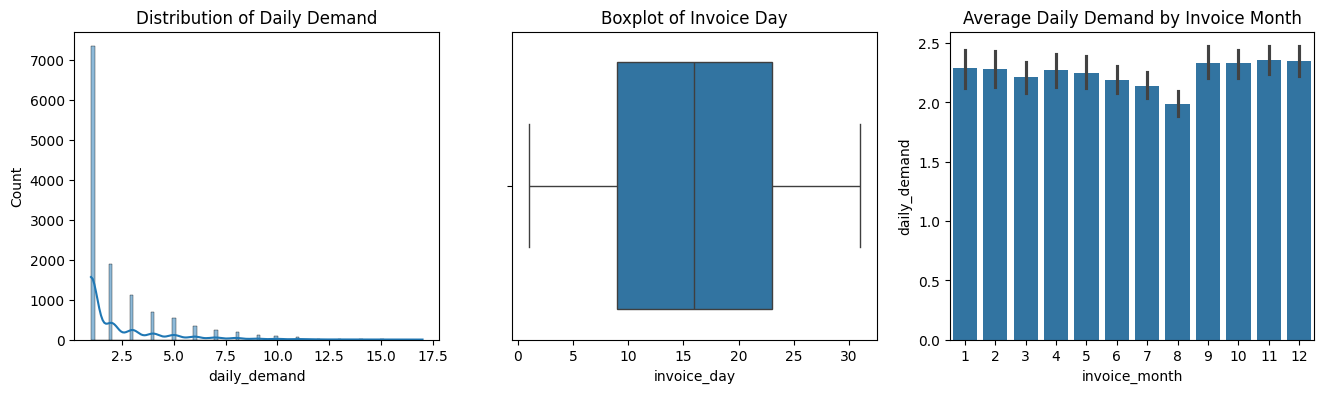

In [ ]:
# prompt: plot univariate analysis visualizations for df_grouped2

# Plot univariate analysis visualizations for df_grouped2
#import matplotlib.pyplot as plt

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Plot the distribution of daily_demand
sns.histplot(data=df_grp2, x="daily_demand", kde=True, ax=axes[0])
axes[0].set_title("Distribution of Daily Demand")

# Plot the boxplot of invoice_day
sns.boxplot(data=df_grp2, x="invoice_day", ax=axes[1])
axes[1].set_title("Boxplot of Invoice Day")

# Plot the bar chart of invoice_month
sns.barplot(data=df_grp2, x="invoice_month", y="daily_demand", ax=axes[2])
axes[2].set_title("Average Daily Demand by Invoice Month")

# Show the plot
plt.show()


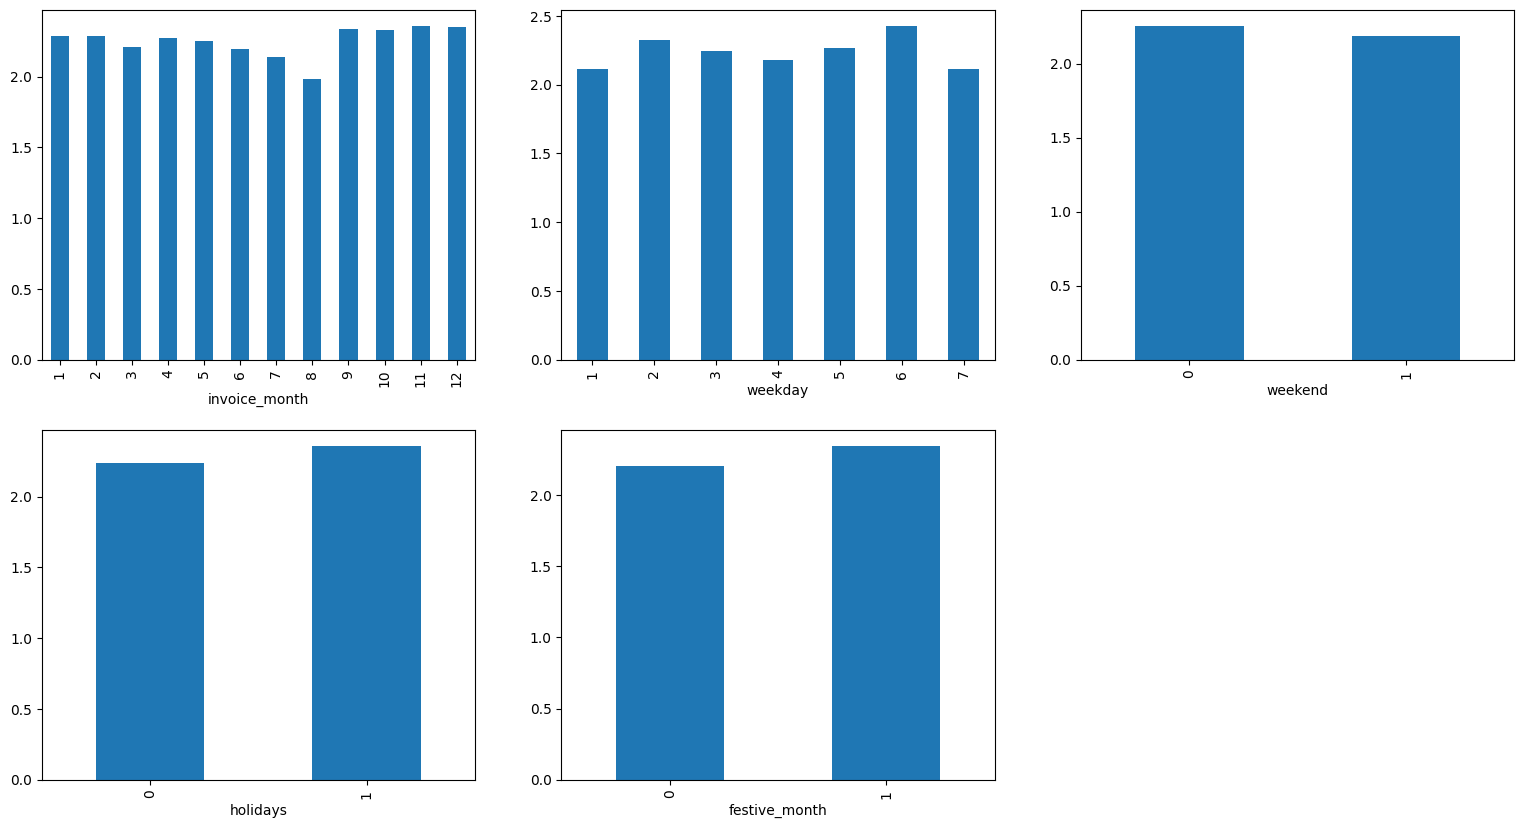

In [ ]:
features = ['invoice_month', 'weekday', 'weekend', 'holidays', 'festive_month']

plt.subplots(figsize=(19, 10))
for i, col in enumerate(features):
	plt.subplot(2, 3, i + 1)
	df_grp2.groupby(col).mean()['daily_demand'].plot.bar()
plt.show()


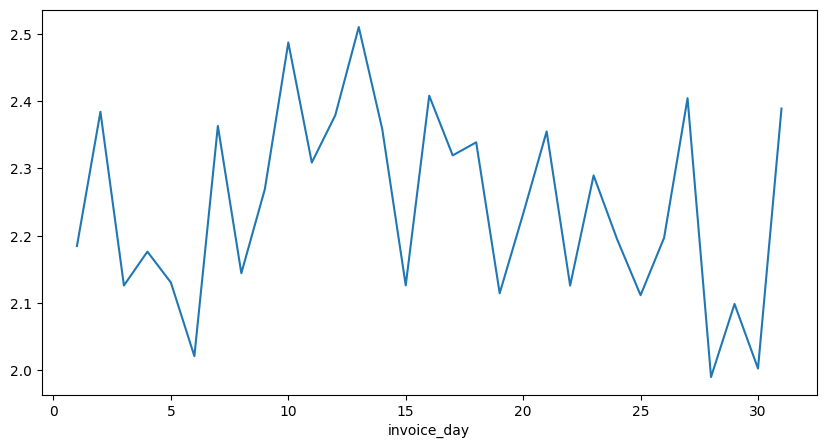

In [ ]:
# line plot of monthly average demand
plt.figure(figsize=(10,5))
df_grp2.groupby('invoice_day').mean()['daily_demand'].plot()
plt.show()

**Insights**

* Daily demand is almost even across all the week days.

* Mid week has slightly higher daily demand than the weekends.

* The mid-month days have slightly higher demand than other days of the month.

* Daily demand is uniform in both festive and non-festive months.

* The business is closed during all public holidays.

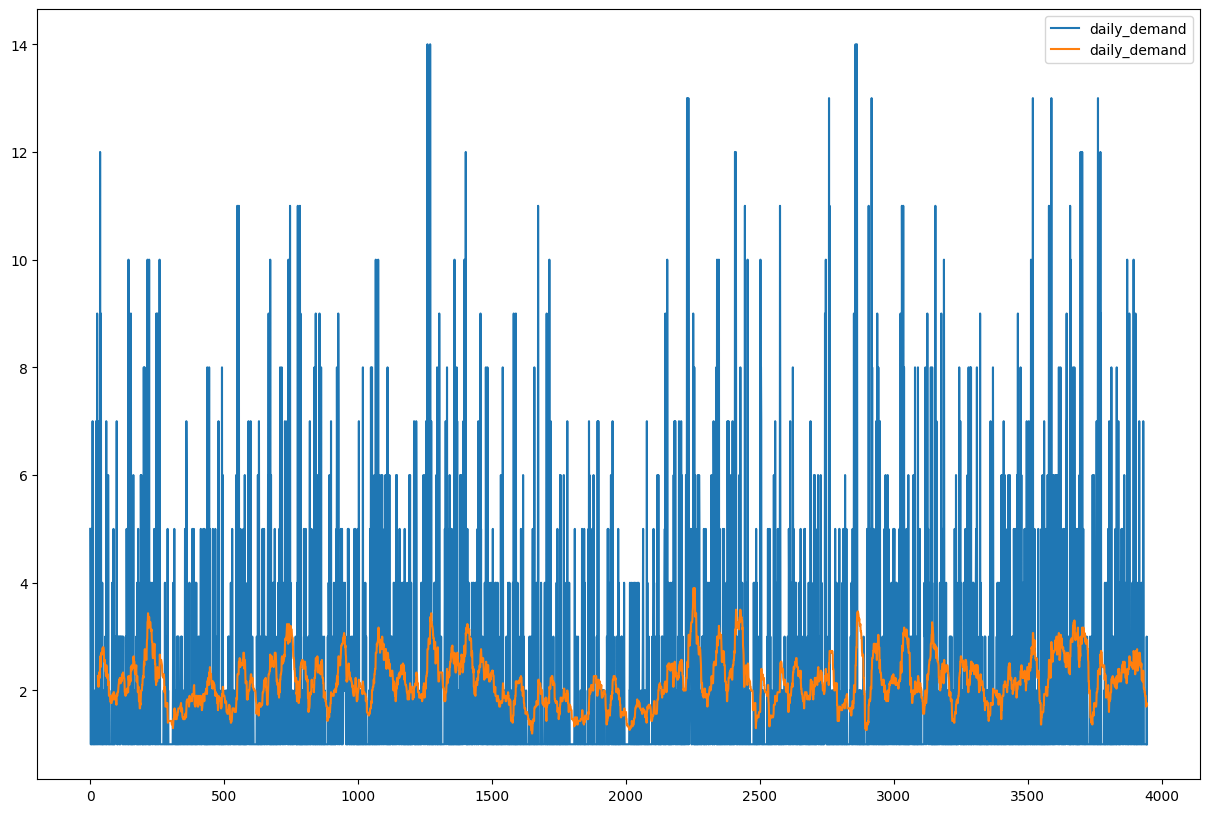

In [ ]:
plt.figure(figsize=(15, 10))

# Calculating Simple Moving Average
# for a window period of 30 days
window_size = 30
data = df_grp2[df_grouped2['invoice_year']==2017]
windows = data['daily_demand'].rolling(window_size)
sma = windows.mean()
sma = sma[window_size - 1:]

data['daily_demand'].plot()
sma.plot()
plt.legend()
plt.show()


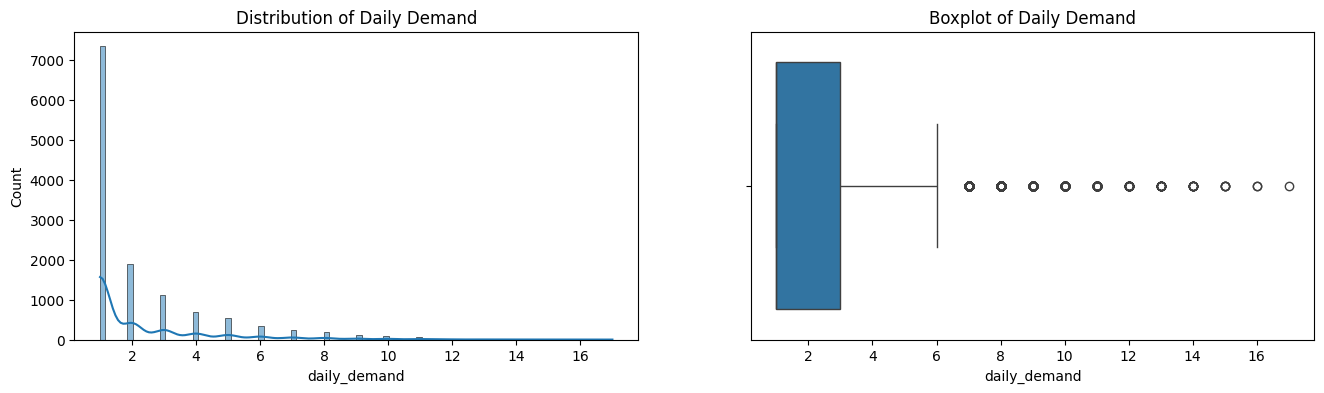

In [ ]:
# prompt: print distribution plot and box plot for daily_demand in df_grp2

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Plot the distribution of daily_demand
sns.histplot(data=df_grp2, x="daily_demand", kde=True, ax=axes[0])
axes[0].set_title("Distribution of Daily Demand")

# Plot the boxplot of daily_demand
sns.boxplot(data=df_grp2, x="daily_demand", ax=axes[1])
axes[1].set_title("Boxplot of Daily Demand")

# Show the plot
plt.show()


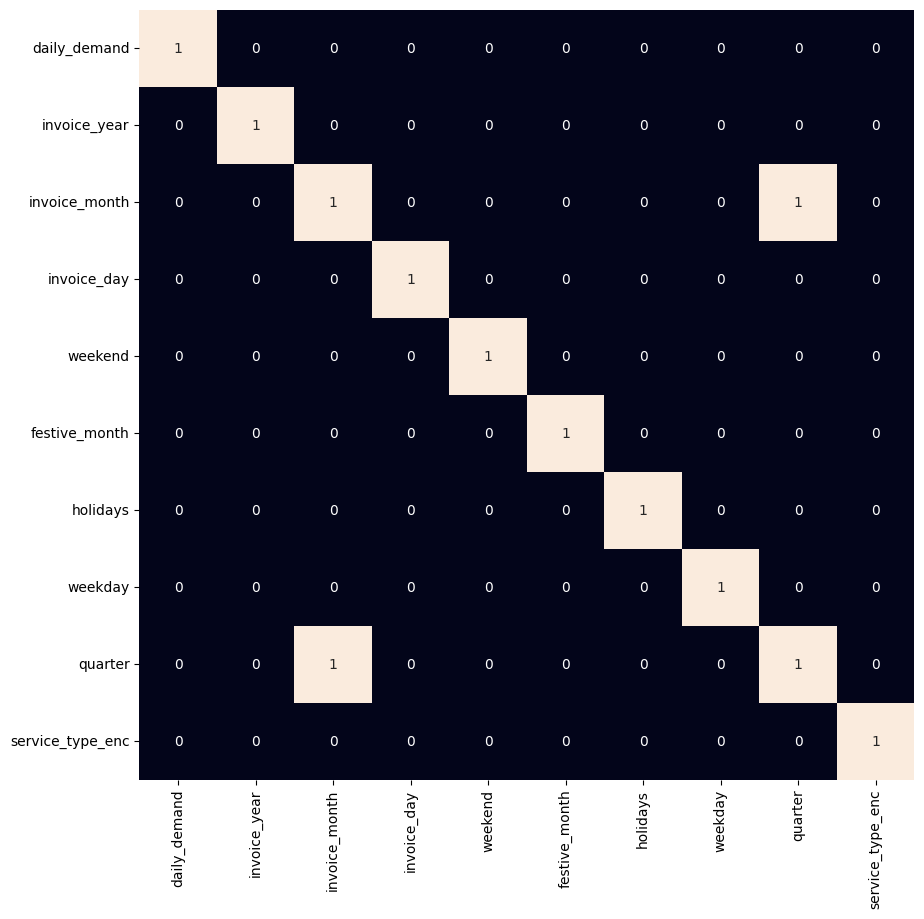

In [ ]:
# correlation
plt.figure(figsize=(10, 10))
sns.heatmap(df_grp2.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

**Note:** We remove the outliers from the data.

In [ ]:
df2 = df_grp2[df_grp2['daily_demand']<3]
df2.head()

,invoice_date,service_type,daily_demand,invoice_year,invoice_month,invoice_day,weekend,festive_month,holidays,weekday,quarter,service_type_enc
2,2017-01-06,BRAKE SHOE,1,2017,1,6,1,0,0,5,1,46
3,2017-01-06,CARBURETOR CLEANING,1,2017,1,6,1,0,0,5,1,61
5,2017-01-06,CRASH GUARD,1,2017,1,6,1,0,0,5,1,117
6,2017-01-06,Clutch cable,1,2017,1,6,1,0,0,5,1,120
7,2017-01-06,DISC LEVER,1,2017,1,6,1,0,0,5,1,124


In [ ]:
df2.tail()

,invoice_date,service_type,daily_demand,invoice_year,invoice_month,invoice_day,weekend,festive_month,holidays,weekday,quarter,service_type_enc
12660,2019-06-01,NUMBER PLATE,1,2019,6,1,0,0,0,6,2,310
12661,2019-06-01,NUMBER PLATE CLAMP,1,2019,6,1,0,0,0,6,2,311
12662,2019-06-01,OIL FILTER,1,2019,6,1,0,0,0,6,2,318
12663,2019-06-01,POLISH,2,2019,6,1,0,0,0,6,2,346
12664,2019-06-01,SPROCKET RUBBER,1,2019,6,1,0,0,0,6,2,422


In [ ]:
# Dropping columns not relevant for analysis - invoice_date, stock_item
df2.drop(['invoice_date', 'invoice_year', 'service_type'], axis=1, inplace=True)
df2.head()

,daily_demand,invoice_month,invoice_day,weekend,festive_month,holidays,weekday,quarter,service_type_enc
2,1,1,6,1,0,0,5,1,46
3,1,1,6,1,0,0,5,1,61
5,1,1,6,1,0,0,5,1,117
6,1,1,6,1,0,0,5,1,120
7,1,1,6,1,0,0,5,1,124


In [ ]:
df2.shape

(9236, 9)

---

# **6. Predictive Models: Training, Prediction and Comparison**

The next step is to run predictive models using the features generated. We have to split our features into training and test datasets.



---


## **6.1 Data spliting and balancing**


---


We split the data into training/testing set in the ratio 75:25

In [ ]:
features = df2.drop(['daily_demand'], axis=1)
target = df2['daily_demand'].values


X_train, X_val, Y_train, Y_val = train_test_split(features, target,
												test_size = 0.25,
												random_state=22)
X_train.shape, X_val.shape


((6927, 8), (2309, 8))

In [ ]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)



---

## **6.2 Model Training**


---



In [ ]:
# Runing predictive models

# Define models
models = [
    LinearRegression(),
    Ridge(),
    XGBRegressor(),
    RandomForestRegressor()
]

# Train models
for model in models:
    model.fit(X_train, Y_train)
    print("=" *60)
    print(f"Model: {model.__class__.__name__}")
    print("=" *60)
    print(f"Training score: {model.score(X_train, Y_train)}")
    print(f"Validation score: {model.score(X_val, Y_val)}")
    print("\n")

# Evaluate models using cross-validation
for model in models:
    scores = cross_val_score(model, X_train, Y_train, cv=5)
    print("=" *100)
    print(f"Model: {model.__class__.__name__}")
    print(f"Cross-validation scores: {scores}")
    print(f"Average cross-validation score: {scores.mean():.3f}")
    print("\n")



Model: LinearRegression
Training score: 0.016218342061233515
Validation score: -0.004374259986582807


Model: Ridge
Training score: 0.016218340872047987
Validation score: -0.00436872600701399


Model: XGBRegressor
Training score: 0.5795640258324795
Validation score: 0.1077088490878031


Model: RandomForestRegressor
Training score: 0.8676374033090284
Validation score: 0.09491386476489705


Model: LinearRegression
Cross-validation scores: [0.01443127 0.01514158 0.00999062 0.01589238 0.01160741]
Average cross-validation score: 0.013


Model: Ridge
Cross-validation scores: [0.01443317 0.01514122 0.00999389 0.01589293 0.0116094 ]
Average cross-validation score: 0.013


Model: XGBRegressor
Cross-validation scores: [0.02896009 0.04278989 0.11110777 0.05999396 0.06091729]
Average cross-validation score: 0.061


Model: RandomForestRegressor
Cross-validation scores: [0.03237807 0.04647502 0.09079781 0.05611558 0.07541492]
Average cross-validation score: 0.060






---

## **6.3 Model Testing**


---



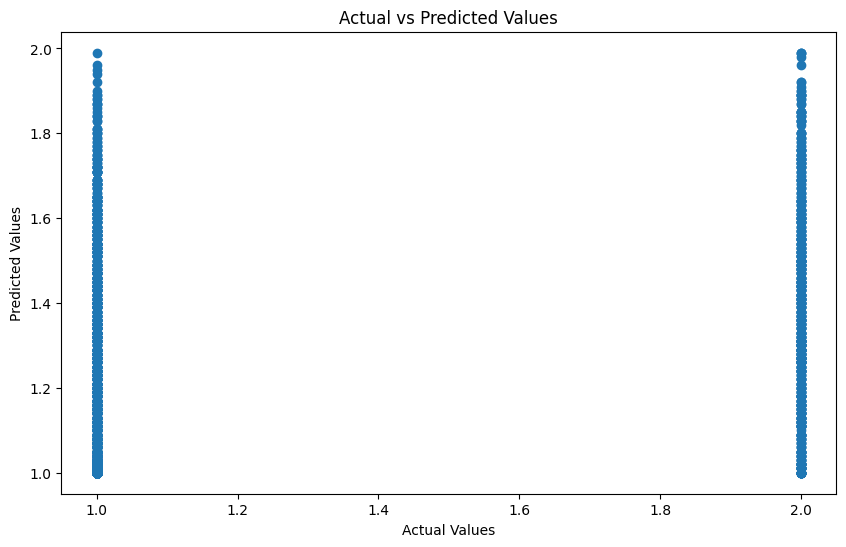

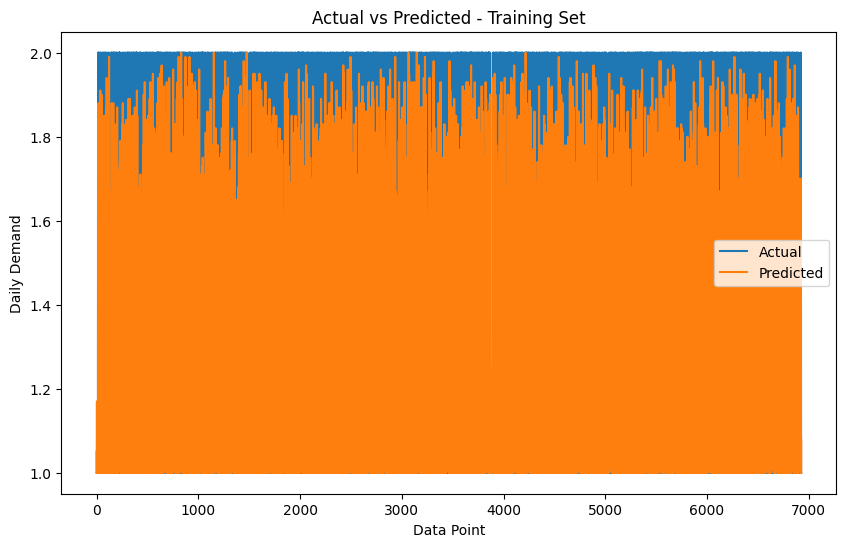

Mean absolute error: 0.268


In [ ]:
# Testing the best model and plotting a graph of actual versus prediction

# Select the best model based on cross-validation score
best_model = RandomForestRegressor()

# Train the best model on the entire dataset
best_model.fit(X_train, Y_train)

# Make predictions on the validation set
y_pred = best_model.predict(X_val)

# Plot the actual versus predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_val, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


# Test the best model on the df2 training set
y_pred_train = best_model.predict(X_train)

# Plot a line graph of actual versus prediction
plt.figure(figsize=(10, 6))
plt.plot(Y_train, label="Actual")
plt.plot(y_pred_train, label="Predicted")
plt.xlabel("Data Point")
plt.ylabel("Daily Demand")
plt.title("Actual vs Predicted - Training Set")
plt.legend()
plt.show()

# Evaluate the model using mean absolute error
mae_score = mae(Y_val, y_pred)
print(f"Mean absolute error: {mae_score:.3f}")


# **Results and conclusion**
The project aimed to build an inventory predictive model to enable an automotive spare parts business to implement JIT inventory management. A datset for 2017 demand was provided. Feature engineering was conducted in order to come up with insightful features that impact demand. The following five models were evaluated:
* Linear Regression,

* Ridge,
    
* XGBRegressor,
    
* Random Forest Regressor.

**RandomForestRegressor** proved to be the best model based on cross-validation score. The Training Score for Random Forest Regressor was **86.1%**, lower than the Training score for XGB Regressor that scored 99.8%.
However, XGB failed on the average cross validation score.